In [1]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings

warnings.filterwarnings("ignore")
#---------导入数据-----------#
data = pd.read_table('melon_dataset.txt')
# print(data)
data1 = copy.copy(data)
data1['好瓜'] = data1['好瓜']=='是'
data1['好瓜'] = data1['好瓜'].astype(np.int)
# print(data)
# print(data1)
datas = data[['密度','含糖率']]
datas.hist(bins=50,figsize=(20,15))
datas.head()
datas.info()
data1.plot(kind="scatter", x="密度", y="含糖率",label='好瓜',c='好瓜',
          alpha=0.8,cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()
# data1.plot(kind="scatter", x="密度", y="含糖率",color='red')
# data2.plot(kind="scatter", x="密度", y="含糖率",color='blue')

# data1.plot(kind="scatter", x="密度", y="含糖率",label='好瓜',c='好瓜',
#           alpha=0.8,cmap=plt.get_cmap("jet"),colorbar=True)
# plt.legend()
# x1 = np.arange(0.1,1,0.01)
# x2 = np.arange(0.1,1,0.01)
# y = 0.4383848667366168 2.1751153149824844 -0.22559980671212054
# plt.plot(x1,y)
# fig = plt.figure()
# ax1 = plt.axes(projection='3d')
# zd = data1['好瓜'].values
# xd = data1['密度'].values
# yd = data1['含糖率'].values
# ax1.scatter3D(xd,yd,zd, cmap='Blues')  #绘制散点图
# x1 = np.arange(0.1,0.5,0.01)
# x2 = np.arange(0.1,0.5,0.01)
# y = 0.4383848667366168*x1+ 2.1751153149824844*x2 -0.22559980671212054
# ax1.plot3D(x1,x2,y,'gray')    #绘制空间曲线

#---------处理数据-----------#

data = data.T
#print('data:',data)
X = data.iloc[1:3]
Y = data.iloc[3]
#print('X:',X)
#print('Y',Y)
#转化为标签(为列向量)
Y = Y=='是'
Y = Y.values
y = Y.astype(np.int)
y = y.T
y = y.astype(np.float)
print('y:',y)
#转化为特征值(为两个列向量)
X = X.values
X = X.T
print('X:',X)
#给特征值添加偏置**************************
X = np.c_[X,np.ones(X.shape[0])]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
密度     17 non-null float64
含糖率    17 non-null float64
dtypes: float64(2)
memory usage: 352.0 bytes
y: [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
X: [[0.6970000000000001 0.46]
 [0.774 0.376]
 [0.634 0.264]
 [0.608 0.318]
 [0.556 0.215]
 [0.40299999999999997 0.237]
 [0.48100000000000004 0.149]
 [0.43700000000000006 0.21100000000000002]
 [0.6659999999999999 0.091]
 [0.23399999999999999 0.267]
 [0.245 0.057]
 [0.34299999999999997 0.099]
 [0.639 0.161]
 [0.657 0.198]
 [0.36 0.37]
 [0.593 0.042]
 [0.7190000000000001 0.10300000000000001]]


pre: [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
loss: 0.23529411764705885
pre [1.080507487227321 0.9315534369683709 0.6265666415434148
 0.7326248611509789 0.48579197197527874 0.4665716235001644
 0.30935549690932646 0.42492371126332446 0.2643000104036281
 0.45773803951115194 0.005786059988926506 0.14010261985072686
 0.4047216899482459 0.49309188372118323 0.7370114090545596
 0.12571726518466164 0.31363579210998965]
0.7058823529411765


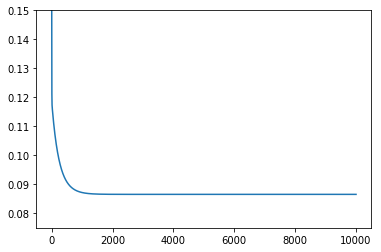

W_normal [0.4383848667366168 2.1751153149824844 -0.22559980671212054]
pre1 [1.0805074902952443 0.9315534385754352 0.6265666419542705
 0.7326248624281726 0.4857919719146726 0.4665716242335848
 0.30935549612058233 0.4249237115130853 0.2643000081978723
 0.45773804120457107 0.005786058592352178 0.14010261876180496
 0.40472168884475757 0.49309188310036856 0.7370114118565807
 0.12571726249195758 0.31363578991470287]
acc1 0.7058823529411765


In [2]:
#-----------迭代算法----------#

def linear(X,y,k):
    W = np.zeros(X.shape[1])
    pre = np.dot(X,W)
    print("pre:",pre)
    loss = np.dot((y-pre).T,(y-pre)/(len(y)*2))
    print("loss:",loss)
    loss = np.zeros(k)
    for i in range(k):
        W = W - 0.15*np.dot(X.T,pre-y)/len(y)
        pre = np.dot(X,W)
        loss[i] = np.dot((y-pre).T,(y-pre))/(len(y)*2)
    t = y.sum()
    print("pre",pre)
    acc = pre>t/len(y)
    acc = acc.astype(np.int)
    acc = acc==y
    acc = acc.astype(np.int)
    acc = acc.sum()/len(y)
    return acc,loss

#----------验证算法准确率-------------#
acc,loss = linear(X,y,10000)
print(acc)

#-----------画损失函数----------#
plt.plot(loss)
plt.ylim(0.075,0.15)
plt.show()

#-----------正规方程组法------------#

W_normal = np.dot(X.T,X)
W_normal = np.array(W_normal,dtype='float')
W_normal = np.linalg.pinv(W_normal)
W_normal = np.dot(W_normal,X.T)
W_normal = np.dot(W_normal,y)
print("W_normal",W_normal)
pre1 = np.dot(X,W_normal)
print("pre1",pre1)
t = y.sum()
acc1 = pre1>t/len(y)
acc1 = acc1.astype(np.int)
acc1 = acc1==y
acc1 = acc1.astype(np.int)
acc1 = acc1.sum()/len(y)
print("acc1",acc1)